# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(None)

In [5]:
# import pandas as pd
# pedDf = pd.read_csv("../data/location-2/2022-11-19-fps-2.5-scene-31-pedestrians.csv")
# otherDf = pd.read_csv("../data/location-2/2022-11-19-fps-2.5-scene-31-others.csv")
# pedDf.head()

In [6]:
from extractors.LocationData import LocationData
sceneData = LocationData.load("../data/location-2", "2023-05-04-fps-10-scene-240.dill")

2023-05-07 19:04:28.830 | INFO     | extractors.LocationData:load:530 - reading from ../data/location-2\2023-05-04-fps-10-scene-240.dill


In [10]:

sceneData.backgroundImagePath = f"{dataDir}/18_background.png"

2023-05-07 19:05:51.646 | INFO     | tools.TrajectoryVisualizer:initPlot:32 - Loading background image from E:/Datasets/inD-dataset-v1.0/data//18_background.png


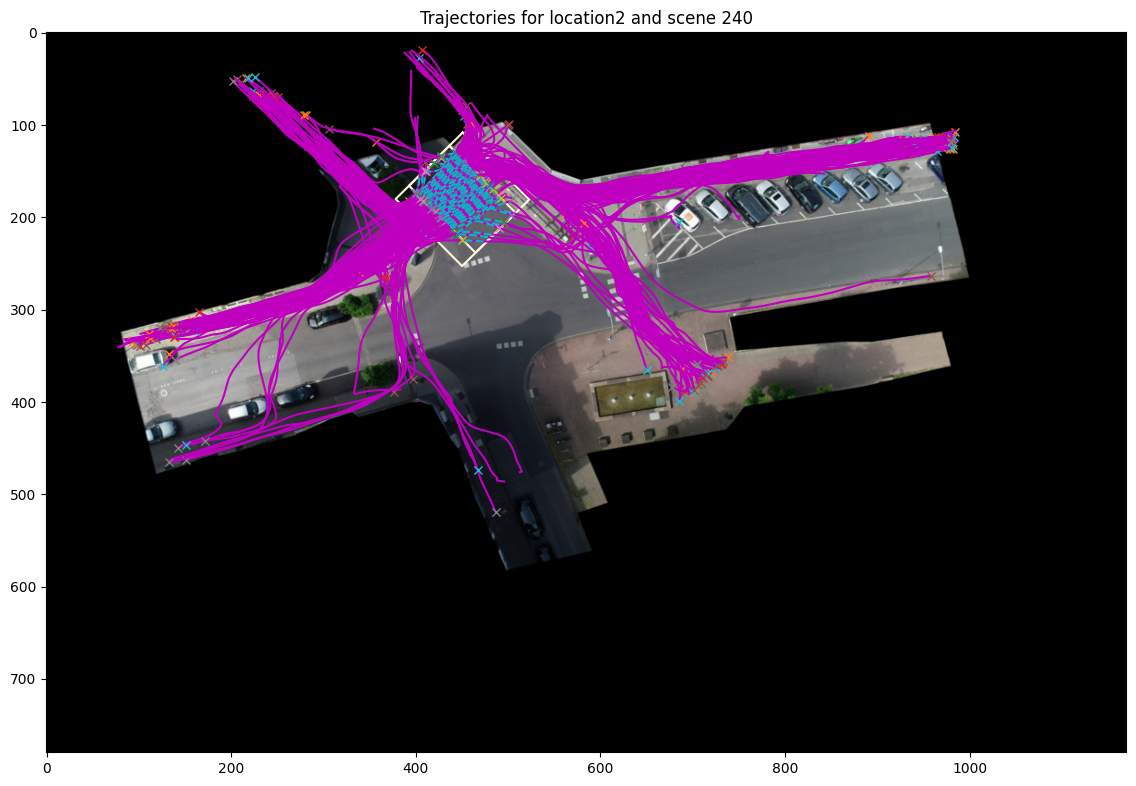

In [11]:
visualizer.showLocationSceneData(sceneData, onlyClipped=False, showOthers=False)
# visualizer.showLocationSceneData(sceneData, onlyClipped=True)

2023-05-07 19:11:38.051 | INFO     | tools.TrajectoryVisualizer:initPlot:33 - Loading background image from E:/Datasets/inD-dataset-v1.0/data//18_background.png


Showing fast_pedestrian problems
         index  recordingId  trackId  frame  trackLifetime   xCenter  \
210887  346371           23      300  15555              0   70.4128   
210888  346372           23      300  15557              2  70.21742   
210889  346373           23      300  15559              4   70.0219   
210890  346374           23      300  15561              6  69.82769   
210891  346375           23      300  15563              8  69.63388   
...        ...          ...      ...    ...            ...       ...   
211143  346627           23      300  16067            512  28.97913   
211144  346628           23      300  16069            514  28.76248   
211145  346629           23      300  16071            516  28.54515   
211146  346630           23      300  16073            518  28.32677   
211147  346631           23      300  16075            520  28.10722   

         yCenter    heading  width  length  xVelocity  yVelocity  \
210887  -36.0287  159.93908    0.0

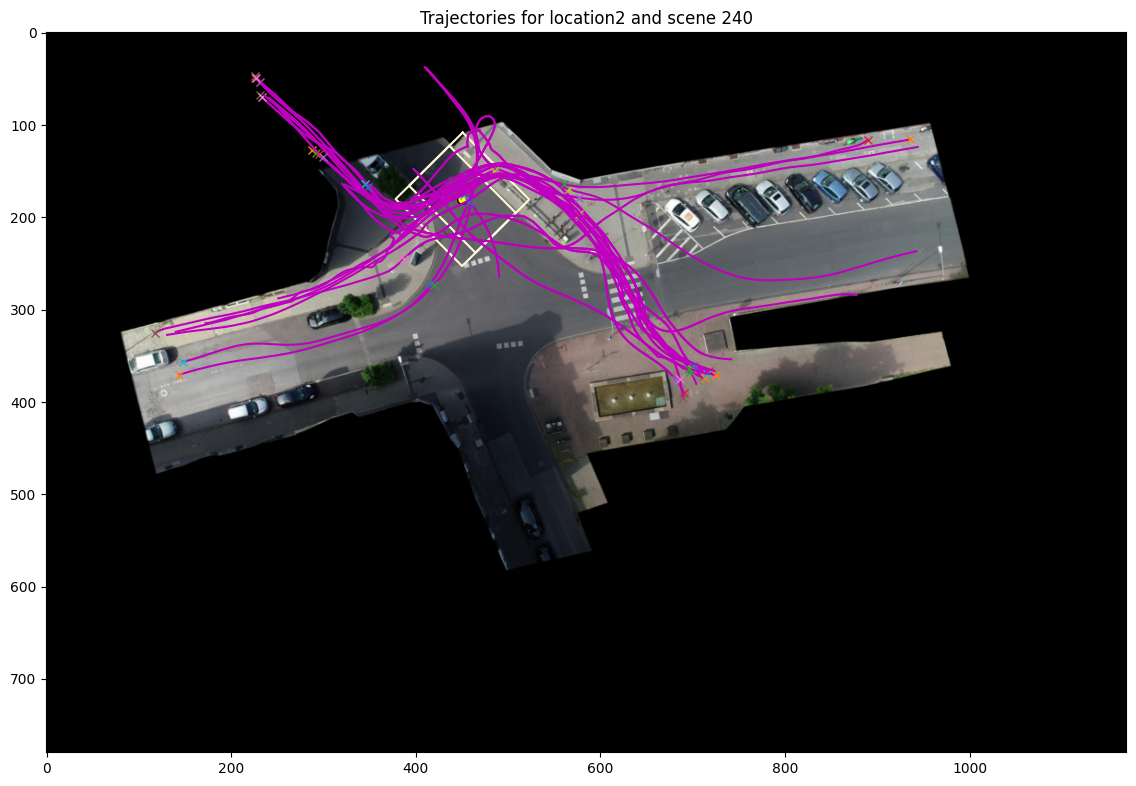

In [20]:
visualizer.showSceneProblems(sceneData)

In [12]:
pedDf = sceneData.getPedDataInSceneCoordinates()
otherDf = sceneData.getOtherDataInSceneCoordinates()
sceneMeta = sceneData.getMeta()

In [13]:
pedDf.groupby(["uniqueTrackId"]).count()

index  recordingId  trackId  frame  trackLifetime  xCenter  \
uniqueTrackId                                                               
18061             43           43       43     43             43       43   
18128             75           75       75     75             75       75   
18185             46           46       46     46             46       46   
18211             52           52       52     52             52       52   
18262             65           65       65     65             65       65   
...              ...          ...      ...    ...            ...      ...   
29547             72           72       72     72             72       72   
29548             85           85       85     85             85       85   
29561             75           75       75     75             75       75   
29566             45           45       45     45             45       45   
29577             51           51       51     51             51       51   

               yCenter  heading  width  length  ...  yAcceleration  sceneId  \
uniqueTrackId                                   ...                           
18061               43       43     43      43  ...             43       43   
18128               75       75     75      75  ...             75       75   
18185               46       46     46      46  ...             46       46   
18211               52       52     52      52  ...             52       52   
18262               65       65     65      65  ...             65       65   
...                ...      ...    ...     ...  ...            ...      ...   
29547               72       72     72      72  ...             72       72   
29548               85       85     85      85  ...             85       85   
29561               75       75     75      75  ...             75       75   
29566               45       45     45      45  ...             45       45   
29577               51       51     51      51  ...             51       51   

               roadWidth  speed  sceneX  sceneY  sceneXVelocity  \
uniqueTrackId                                                     
18061                 43     43      43      43              43   
18128                 75     75      75      75              75   
18185                 46     46      46      46              46   
18211                 52     52      52      52              52   
18262                 65     65      65      65              65   
...                  ...    ...     ...     ...             ...   
29547                 72     72      72      72              72   
29548                 85     85      85      85              85   
29561                 75     75      75      75              75   
29566                 45     45      45      45              45   
29577                 51     51      51      51              51   

               sceneYVelocity  sceneXAcceleration  sceneYAcceleration  
uniqueTrackId                                                          
18061                      43                  43                  43  
18128                      75                  75                  75  
18185                      46                  46                  46  
18211                      52                  52                  52  
18262                      65                  65                  65  
...                       ...                 ...                 ...  
29547                      72                  72                  72  
29548                      85                  85                  85  
29561                      75                  75                  75  
29566                      45                  45                  45  
29577                      51                  51                  51  

[184 rows x 23 columns]

In [14]:
sceneMeta.head()

uniqueTrackId  initialFrame  finalFrame  numFrames       class  \
0          18061          3208        3292         43  pedestrian   
1          18128          7675        7823         75  pedestrian   
2          18185         12461       12551         46  pedestrian   
3          18211         13675       13777         52  pedestrian   
4          18262         17691       17819         65  pedestrian   

  horizontalDirection verticalDirection  
0                WEST             SOUTH  
1                WEST             NORTH  
2                EAST             NORTH  
3                WEST             NORTH  
4                WEST             SOUTH

In [15]:
sceneMeta.tail()

uniqueTrackId  initialFrame  finalFrame  numFrames            class  \
1353          29238         12194       12446        127  fast_pedestrian   
1354          29240         12261       12479        110  fast_pedestrian   
1355          29285         13958       14394        219  fast_pedestrian   
1356          29513         26648       27636        495  fast_pedestrian   
1357          29575         30148       30802        328  fast_pedestrian   

     horizontalDirection verticalDirection  
1353                WEST             NORTH  
1354                WEST             NORTH  
1355                WEST             SOUTH  
1356                EAST             NORTH  
1357                EAST             NORTH

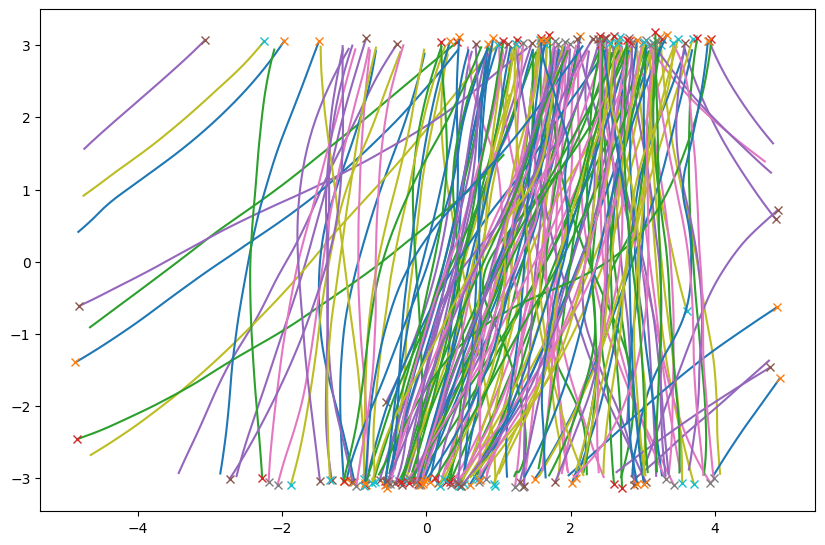

In [16]:
visualizer.showLocalTrajectories(pedDf, "uniqueTrackId", "sceneX", "sceneY") 
# Need cleaning. But, first query this pedestrian ids and check what happened. validate these trajectories velocity to ensure they are indeed pedestrians. 
# If they are we need to create another class - horizontal-pedestrians because they might belong to a scenario.

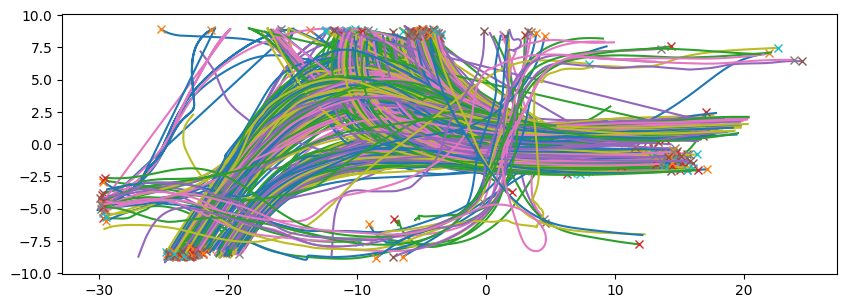

In [17]:
visualizer.showLocalTrajectories(otherDf, "uniqueTrackId", "sceneX", "sceneY")

2022-12-10 18:32:02.891 | INFO     | tools.TrajectoryVisualizer:initPlot:34 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png
2022-12-10 18:32:03.276 | INFO     | tools.TrajectoryVisualizer:initPlot:34 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png
2022-12-10 18:32:03.658 | INFO     | tools.TrajectoryVisualizer:initPlot:34 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png
2022-12-10 18:32:04.035 | INFO     | tools.TrajectoryVisualizer:initPlot:34 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png
2022-12-10 18:32:04.414 | INFO     | tools.TrajectoryVisualizer:initPlot:34 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png
2022-12-10 18:32:04.796 | INFO     | tools.TrajectoryVisualizer:initPlot:34 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png
2022-12-10 18:32:05.186 | IN

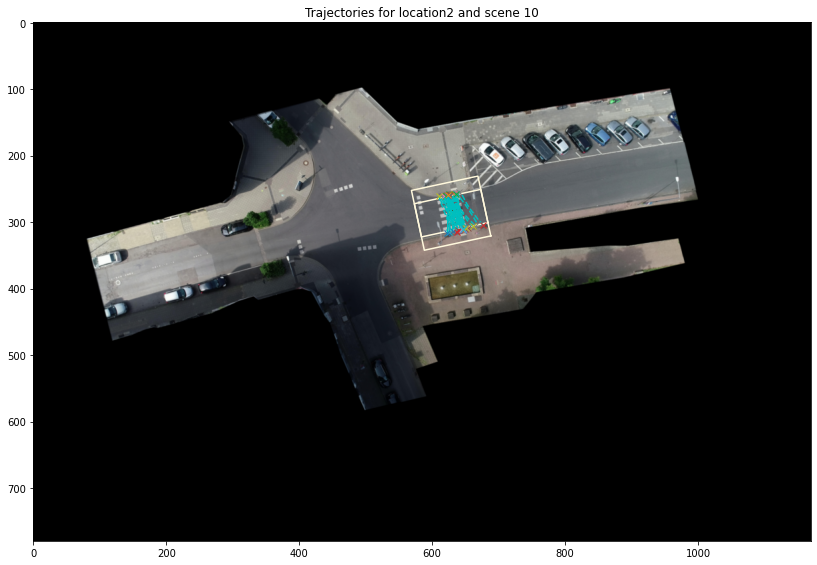

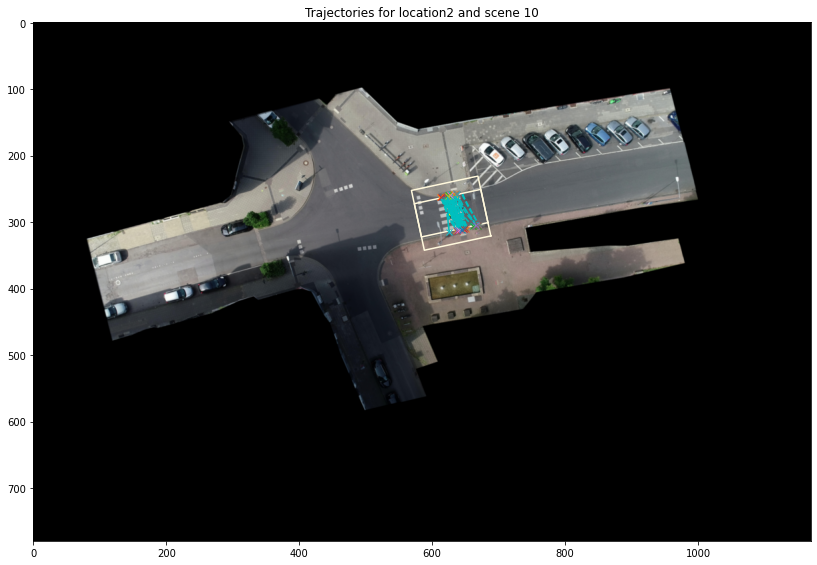

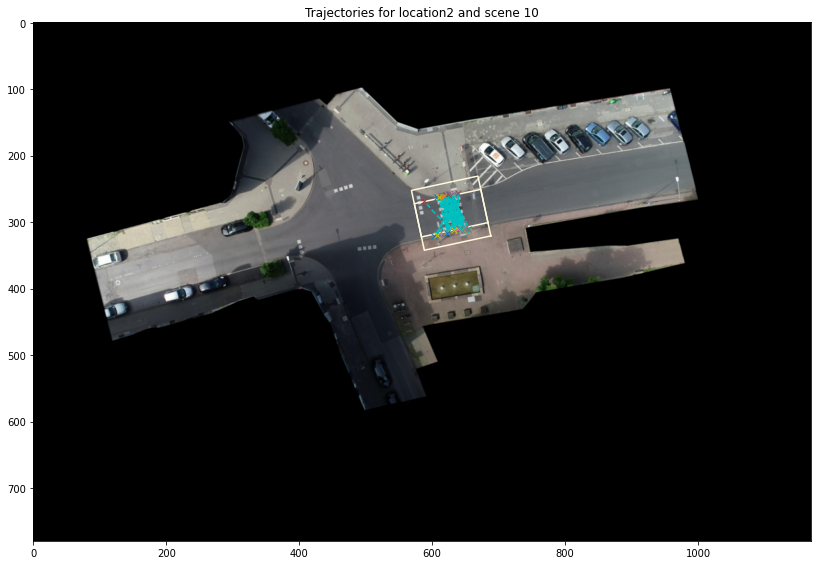

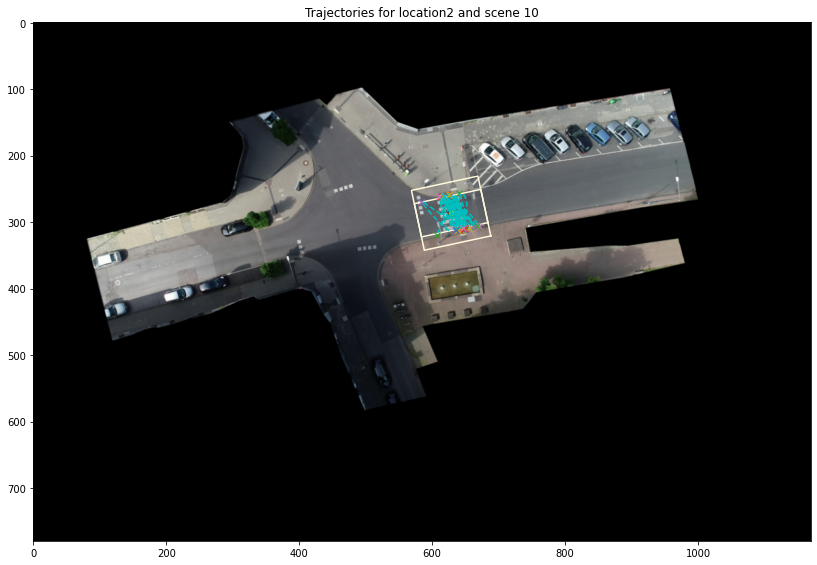

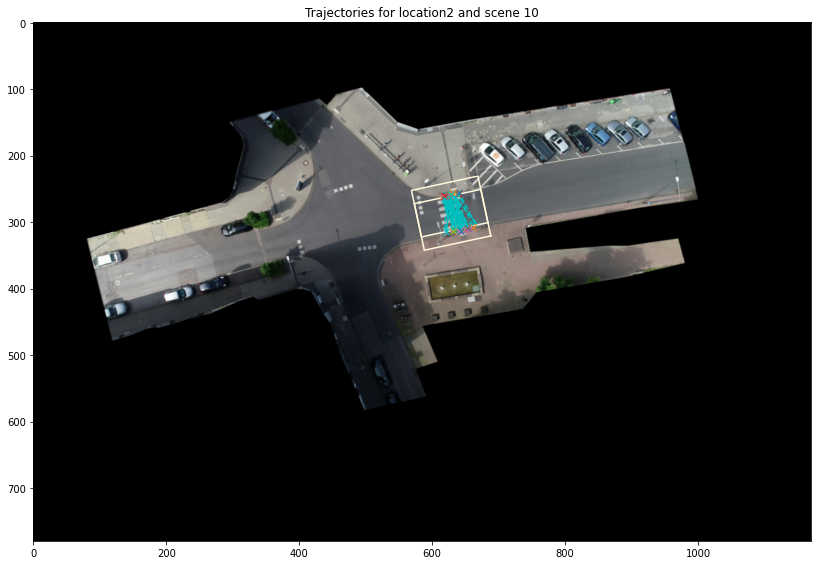

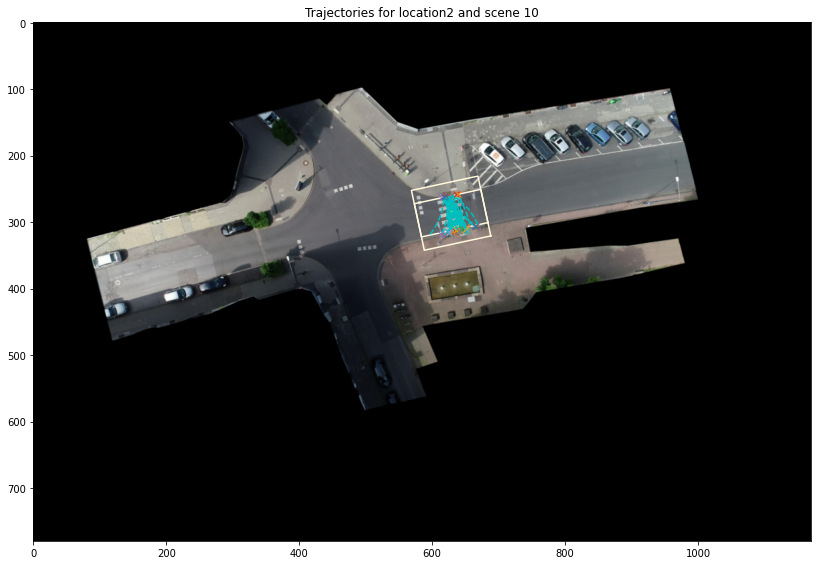

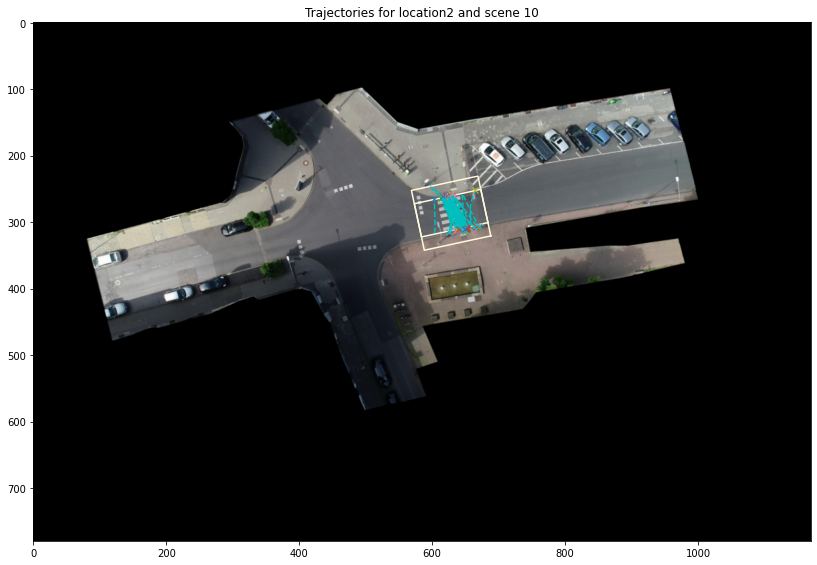

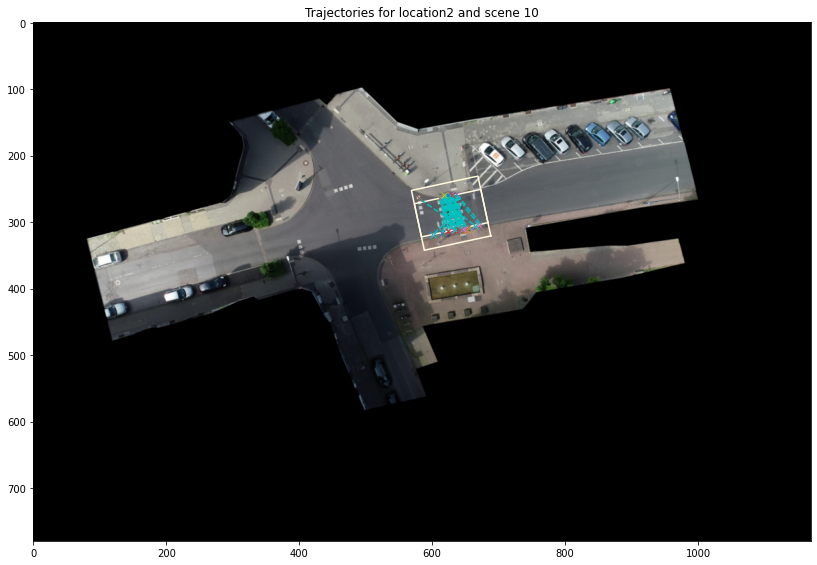

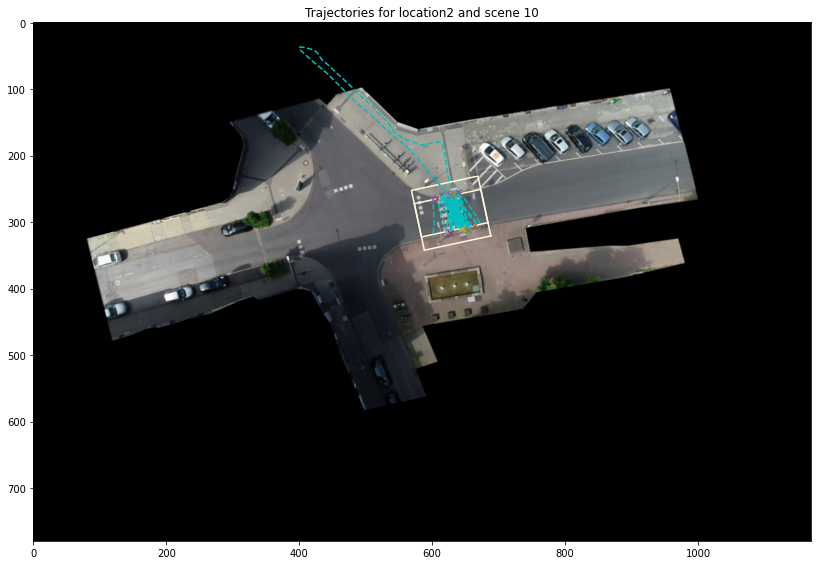

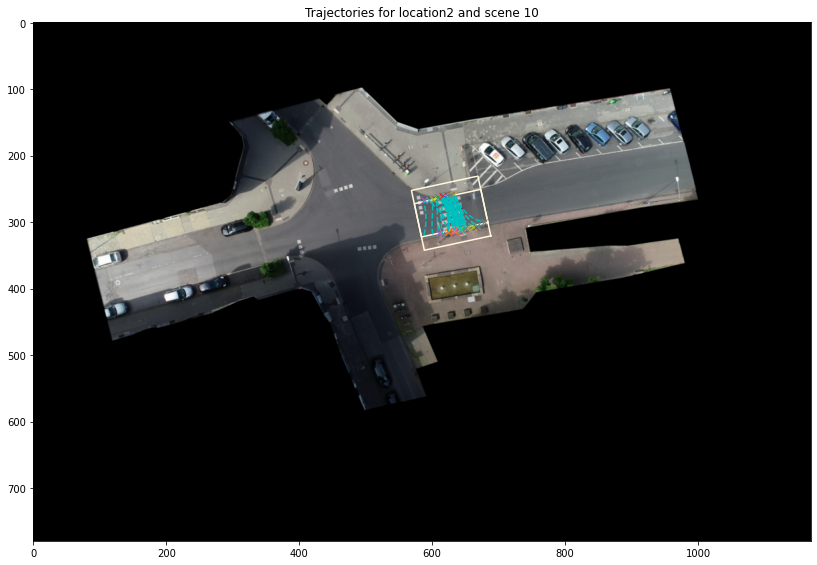

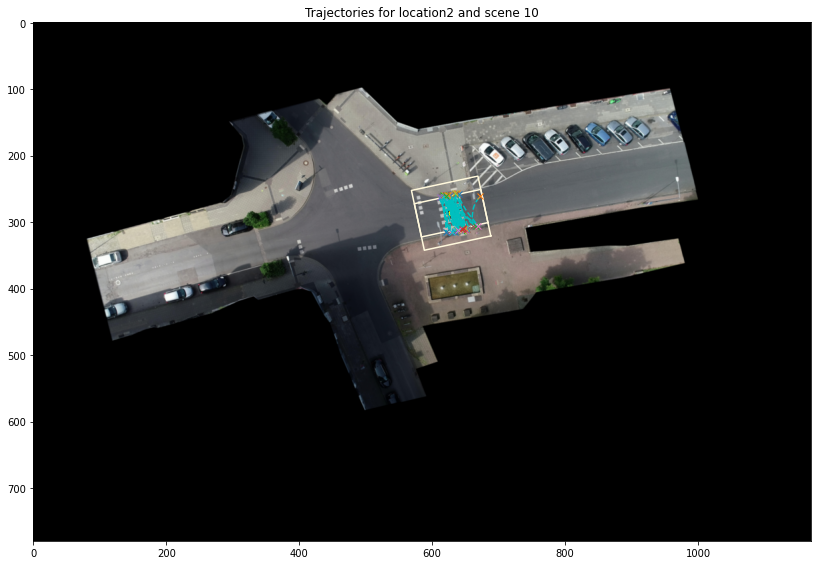

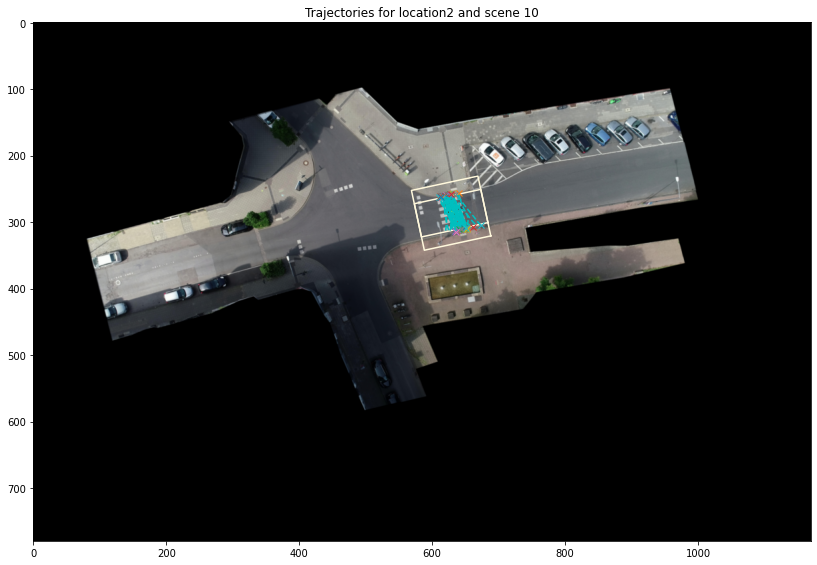

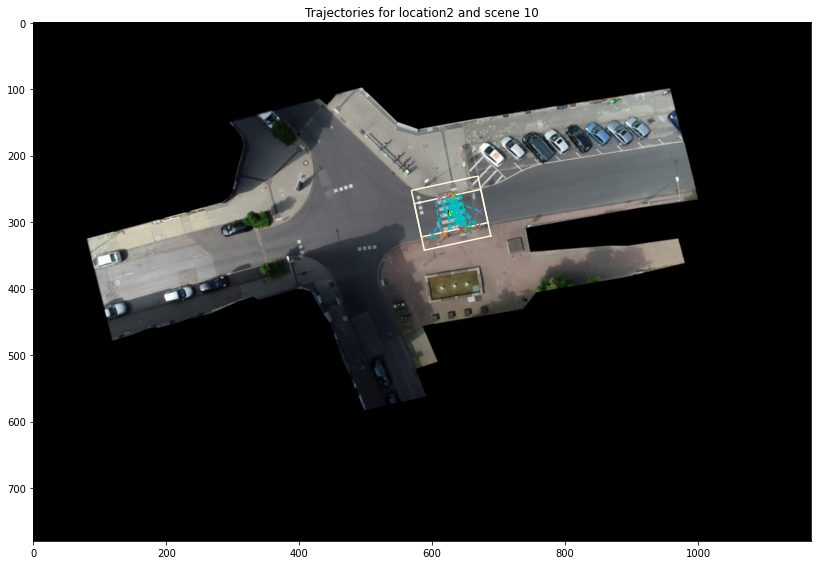

In [16]:
# visualize all peds
from math import ceil
allPedIds = sceneData.uniquePedIds()
limit = 50
nPedIds = len(allPedIds)
nPages = ceil(nPedIds / limit)
for page in range(nPages):
    offset = page * limit
    visualizer.showLocationSceneData(sceneData, onlyClipped=True, showLocal=False, showOthers=False, offset=offset, limit=limit)